In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trad-new-df/fe_TRAD_manual_2.csv


In [2]:
df_trad = pd.read_csv('/kaggle/input/trad-new-df/fe_TRAD_manual_2.csv')

In [3]:
df_trad.describe()

,grade,count_syllables,flesch_kincaid_grade_score,num_of_words,avg_word_length,flesch_reading_score,Average_Syyllabels_count
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,2.954449,11.309141,9.322754,5.688126,5.087556,38.354349,1.923253
std,1.257924,6.508600,4.564178,3.310515,0.860910,32.205121,0.382862
min,1.000000,1.000000,-15.200000,1.000000,1.576923,-134.610000,0.000000
25%,2.000000,6.000000,6.620000,3.000000,4.555556,27.485000,1.700000
50%,4.000000,10.000000,9.180000,5.000000,5.000000,35.605000,2.000000
75%,4.000000,15.000000,12.300000,8.000000,5.500000,54.725000,2.000000
max,4.000000,46.000000,32.780000,32.000000,10.000000,205.820000,4.000000


In [4]:
df_trad.head(4)

,grade,text,count_syllables,flesch_kincaid_grade_score,num_of_words,avg_word_length,flesch_reading_score,Average_Syyllabels_count
0,1,diskusikan gambar sampul di atas dengan menjaw...,7,13.113333,3,6.333333,6.390,2.333333
1,1,pernahkah kalian mendengar suara duk duk,7,2.880000,5,4.600000,83.320,1.400000
2,1,biasanya apa yang berbunyi duk duk,4,1.313333,3,3.666667,90.990,1.333333
3,1,apa yang kalian lihat pada gambar di atas,4,8.790000,2,5.500000,35.605,2.000000


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/2043170753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_trad.corr()


<Axes: >

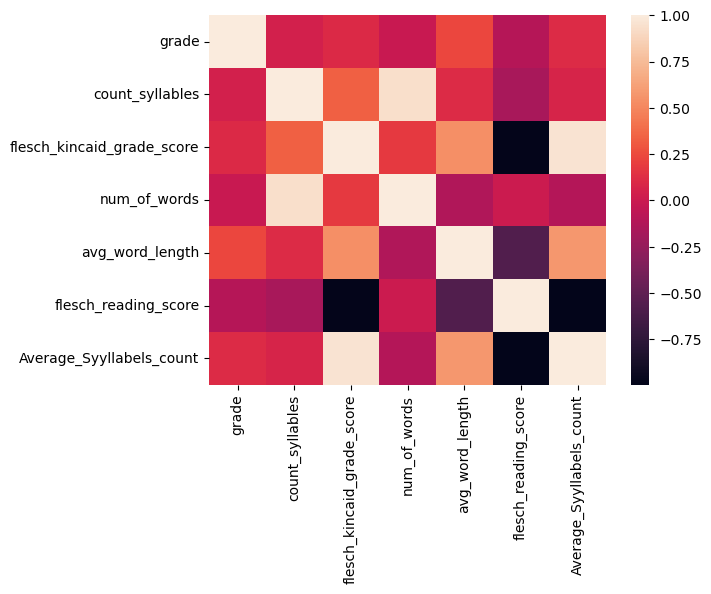

In [5]:
import seaborn as sns
corr_df = df_trad.corr()
sns.heatmap(corr_df)

In [6]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [7]:
#c = df_trad['grade']
X = df_trad.drop('grade', axis=1)
X = X.drop('text', axis=1)
X.head()

,count_syllables,flesch_kincaid_grade_score,num_of_words,avg_word_length,flesch_reading_score,Average_Syyllabels_count
0,7,13.113333,3,6.333333,6.390,2.333333
1,7,2.880000,5,4.600000,83.320,1.400000
2,4,1.313333,3,3.666667,90.990,1.333333
3,4,8.790000,2,5.500000,35.605,2.000000
4,5,8.790000,2,4.500000,35.605,2.000000


In [8]:
from sklearn.model_selection import train_test_split

X = df_trad[['count_syllables', 'flesch_kincaid_grade_score', 'num_of_words', 'avg_word_length', 'flesch_reading_score', 'Average_Syyllabels_count']]
y = df_trad[['grade']]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='auto'))
X, y = resample.fit_resample(X, y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

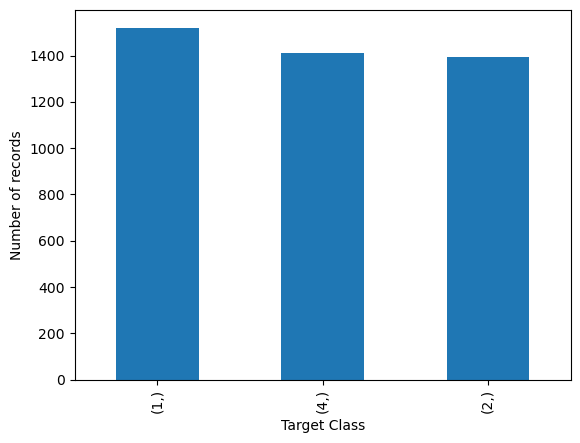

In [12]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
class_rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=20)
class_rf.fit(X_train, y_train)

/tmp/ipykernel_20/1327712900.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  class_rf.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto')

In [14]:
y_pred = class_rf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


[[282  45  44]
 [ 65 196  85]
 [ 89  68 209]]
              precision    recall  f1-score   support

           1      0.647     0.760     0.699       371
           2      0.634     0.566     0.598       346
           4      0.618     0.571     0.594       366

    accuracy                          0.634      1083
   macro avg      0.633     0.633     0.630      1083
weighted avg      0.633     0.634     0.631      1083



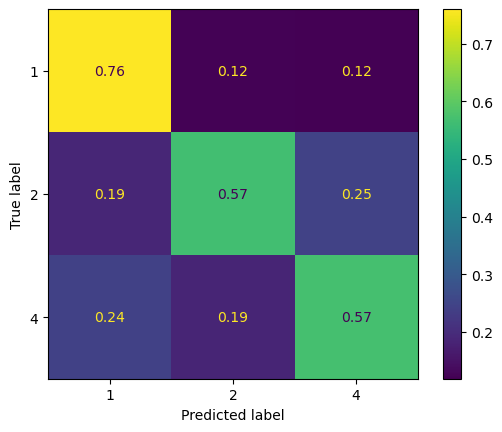

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(class_rf, X_test, y_test, normalize='true')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [18]:
rf_model= RandomForestClassifier()

# parameters = {'n_estimators': [10,100,1000, 1100],
#               'max_features': [6,32,'auto'],
#               'max_depth': [10,20,40],
#               'criterion' :['gini', 'entropy']
#              }

parameters = {'n_estimators': [10,100,1000, 1100],
              'bootstrap': [True, False],
              'max_features': [6,32,'auto', 'sqrt'],
              'max_depth': [10, 20, 30, 40, 50],
              'criterion' :['gini', 'entropy']
             }

# grid_search = GridSearchCV(RandomForestClassifier(), parameters, scoring= 'accuracy', refit = 'True', cv = 5)

grid_search = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, scoring= 'accuracy', refit = 'True')
grid_search = grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [19]:
print('best parameters: ')
print(grid_search.best_params_)
rf_best_params = grid_search.best_params_


best parameters: 
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 100}


In [20]:
rf_model.set_params(**grid_search.best_params_)
rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)

/tmp/ipykernel_20/3224237077.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [21]:
grid_search=grid_search.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, grid_search, digits=3))

[[283  43  45]
 [ 71 193  82]
 [ 86  73 207]]
              precision    recall  f1-score   support

           1      0.649     0.757     0.699       371
           2      0.630     0.552     0.589       346
           4      0.617     0.585     0.600       366

    accuracy                          0.633      1083
   macro avg      0.632     0.631     0.629      1083
weighted avg      0.632     0.633     0.630      1083



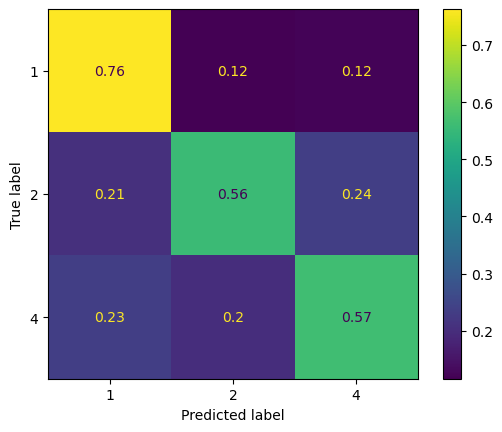

In [22]:
cm = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, normalize='true')